In [88]:
import pandas as pd 
titanic = pd.read_csv('titanic_train.csv')
print titanic.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [89]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print titanic.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [90]:
print titanic['Sex'].unique()

titanic.ix[titanic['Sex'] == 'male','Sex'] = 0
titanic.ix[titanic['Sex'] == 'female','Sex'] = 1

print titanic['Sex'].unique()

['male' 'female']
[0 1]


In [91]:
print titanic['Embarked'].unique()

titanic['Embarked'] = titanic['Embarked'].fillna('S')

titanic.ix[titanic['Embarked']=='S','Embarked'] = 0
titanic.ix[titanic['Embarked']=='C','Embarked'] = 1
titanic.ix[titanic['Embarked']=='Q','Embarked'] = 2

print titanic['Embarked'].unique()

['S' 'C' 'Q' nan]
[0 1 2]


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

In [102]:
#print titanic.describe().columns

predictors = ['Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']

#titanic.shape[1]
alg = LinearRegression()
kf = KFold(titanic.shape[0],n_folds=3,random_state=1)

predictions = []

for train,test in kf :
    train_predictors = titanic[predictors].ix[train,:]
    train_traget = titanic['Survived'].ix[train]
    
    alg.fit(train_predictors,train_traget)
    test_predictors = alg.predict(titanic[predictors].ix[test,:])

    predictions.append(test_predictors)


In [97]:
import numpy as np
#predictions
#predictions = np.concatenate(predictions,axis=0)
#predictions

threshold = [.1,.2,.3,.4,.5]

for t in threshold:
    predictions_t = np.concatenate(predictions,axis=0)
    predictions_t[predictions_t > t] = 1
    predictions_t[predictions_t <= t] = 0
    accuracy = sum(predictions_t[predictions_t == titanic['Survived']]) \
    /float(len(predictions_t))
    print accuracy

#predictions[predictions > .5] = 1
#predictions[predictions <= .5] = 0
#accuracy = sum(predictions[predictions == titanic['Survived']]) / float(len(predictions))
#print accuracy


0.360269360269
0.331088664422
0.316498316498
0.28507295174
0.261503928171


In [103]:
predictions = np.concatenate(predictions,axis=0)

predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
accuracy = sum(predictions[predictions == titanic['Survived']]) / float(len(predictions))
print accuracy

0.261503928171


In [104]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state =1)
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=3)
print scores.mean()

0.787878787879


In [106]:
titanic_test = pd.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [111]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg = RandomForestClassifier(random_state = 1,n_estimators=10,min_samples_split=2,
                             min_samples_leaf=1)

kf = cross_validation.KFold(titanic.shape[0],n_folds=3,random_state=1)
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv = kf)

print scores.mean()



0.785634118967


In [112]:
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
kf = cross_validation.KFold(titanic.shape[0], 3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())


0.814814814815


In [113]:
titanic['FamilySize'] = titanic['SibSp']+titanic['Parch']

titanic['NameLength'] = titanic['Name'].apply(lambda x:len(x))

In [114]:
import re

In [119]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ''

titles = titanic['Name'].apply(get_title)
print pd.value_counts(titles)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64


In [120]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
    
print pd.value_counts(titles)

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [121]:
titanic['Title'] = titles

In [122]:
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt

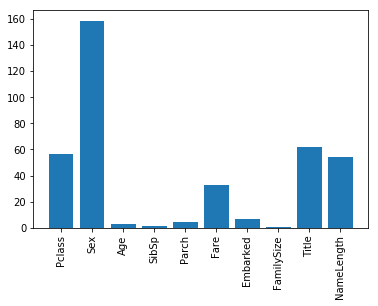

In [123]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic['Survived'])

scores = -np.log(selector.pvalues_)

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation = 'vertical')
plt.show()

In [ ]:
predictors = ["Pclass", "Sex", "Fare", "Title"]
alg = RandomForestClassifier(random_state=1, n_estimators=50, 
                             min_samples_split=8, min_samples_leaf=4)